In [29]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters
from keras import (models, layers)

In [3]:
# Extract training and test samples
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

2121728/2110848 [==============================] - 0s 0us/step


c:\users\wis31\appdata\local\programs\python\python39\lib\site-packages\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\wis31\appdata\local\programs\python\python39\lib\site-packages\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [17]:
# Initialize index-word mapping
word2index = reuters.get_word_index()
index2word = dict([(value, key) for (key, value) in word2index.items()])

def decode_review(enc_review):
    """Helper function to decode the encoded reviews."""
    decoded_review = ' '.join([index2word.get(i-3, '?') for i in enc_review]) # Indices are offset by 3 (0, 1, 2 reserved for special)
    return decoded_review

In [22]:
# Vectorize train and test data.

def vectorize_sequences(sequences, dimension=10_000):
    """One-hot encode the sequence data into vectors."""
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.0
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize train and test labels.
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [25]:
# Setup dense network

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10_000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

# Compile model

model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"]
             )

In [26]:
# Split training data to get validation set

x_val = x_train[:1_000]
partial_x_train = x_train[1_000:]

y_val = one_hot_train_labels[:1_000]
partial_y_train = one_hot_train_labels[1_000:]

In [28]:
# Train model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val)
                   )

Epoch 1/20
16/16 [==============================] - 9s 38ms/step - loss: 3.1752 - accuracy: 0.3890 - val_loss: 1.7877 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5547 - accuracy: 0.6783 - val_loss: 1.3431 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0951 - accuracy: 0.7620 - val_loss: 1.1626 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8801 - accuracy: 0.8087 - val_loss: 1.0586 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6866 - accuracy: 0.8599 - val_loss: 0.9629 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5473 - accuracy: 0.8890 - val_loss: 0.9241 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4224 - accuracy: 0.9166 - val_loss: 0.8993 - val_accuracy: 0.8210
Epoch 8/20
16

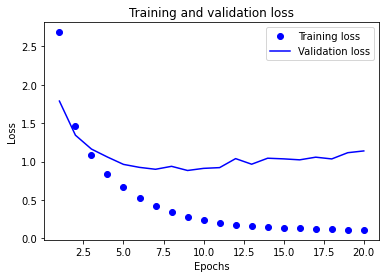

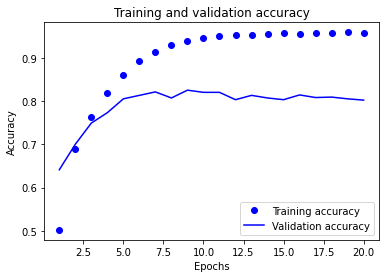

In [36]:
# Plot metrics

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [37]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.2811 - accuracy: 0.7725
